# Evaluations w.r.t. dimensionaly and so on

In [1]:
import numpy as np
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import axis, colorbar, imshow, show, figure, subplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import cm
%matplotlib inline

import os, sys, inspect
import csv

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
save_plots = False

## Paths

In [3]:
from utils_vae_eval_paths import *

HISTORY_PATH = f'{potatodir}/saved_models'
PATH = MEASUREMENTS_FOLDER
FIGURES_FOLDER = FIGURES_FOLDER

## Cost Functions


### All-in-One

In [4]:
latet_dims = (2,4,8,16,32,64,128)

### Nice Plot for Cost Function

In [5]:
# get history for choosen model:
choosen_latent = 64
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

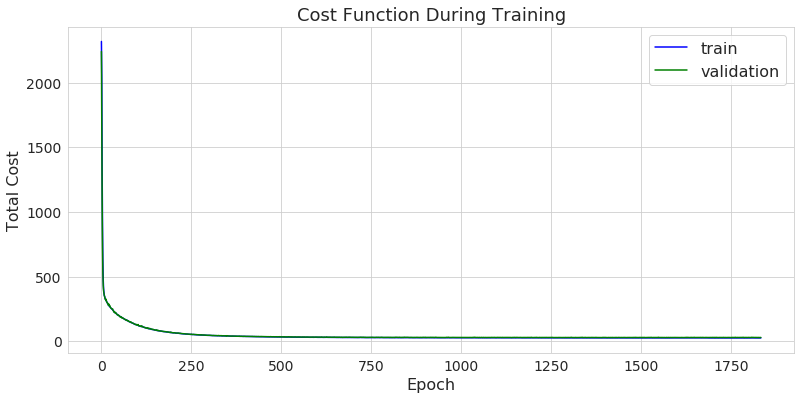

In [6]:
plt.figure(figsize=(13, 6))

# summarize history for loss:
plt.plot(history['loss'], color='blue', label='train')
#plt.plot(history['val_loss'], color='blue', alpha=0.4, label='validation')
plt.plot(history['val_loss'], color='green', label='validation')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Total Cost', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Cost Function During Training', fontsize=18)

#plt.xlim(10,no_epochs)
#plt.ylim(0,1000)
#np.arange(0, no_epochs, step=10)
plt.legend(loc='upper right', fontsize=16)
plt.show()

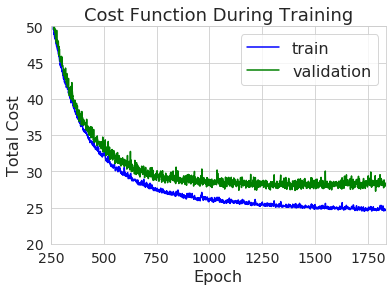

In [7]:
plt.figure(figsize=(6, 4))

# summarize history for loss:
plt.plot(history['loss'], color='blue', label='train')
plt.plot(history['val_loss'], color='green', alpha=1, label='validation')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Total Cost', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Cost Function During Training', fontsize=18)

plt.xlim(250, no_epochs)
plt.ylim(20,50)
#np.arange(0, no_epochs, step=10)
plt.legend(loc='upper right', fontsize=16)
plt.show()

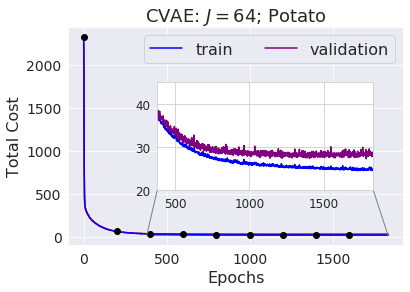

In [8]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CVAE: $J=64$; Potato', fontsize=18)
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200,400,600,800,1000,1200,1400,1600] #,1800,2000]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=3)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 380, no_epochs, 20, 45                         # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_vae_potato.png", dpi=300, bbox_inches='tight')
plt.show()

## Plot the remaining learning curves

In [9]:
save_plots = False

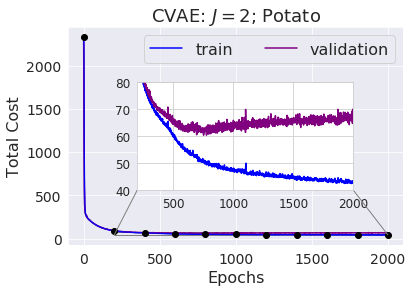

In [10]:
# get history for choosen model:
choosen_latent = 2
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CVAE: $J={:}$; Potato'.format(choosen_latent), fontsize=18)
    
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200,400,600,800,1000,1200,1400,1600,1800,2000]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=5)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 200, no_epochs, 40, 80                         # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_vae_potato_J{choosen_latent}.png", dpi=300, bbox_inches='tight')
plt.show()

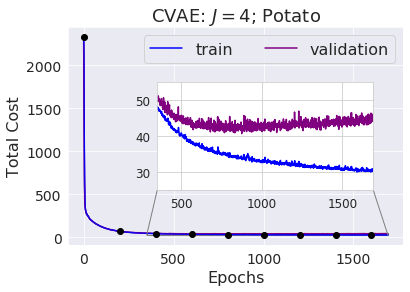

In [11]:
# get history for choosen model:
choosen_latent = 4
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CVAE: $J={:}$; Potato'.format(choosen_latent), fontsize=18)
    
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200,400,600,800,1000,1200,1400,1600]#,1800]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=3)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 350, no_epochs, 25, 55                         # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_vae_potato_J{choosen_latent}.png", dpi=300, bbox_inches='tight')
plt.show()

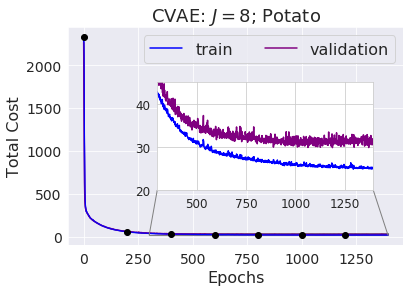

In [12]:
# get history for choosen model:
choosen_latent = 8
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CVAE: $J={:}$; Potato'.format(choosen_latent), fontsize=18)
    
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200,400,600,800,1000,1200]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=3)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 300, no_epochs, 20, 45                         # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_vae_potato_J{choosen_latent}.png", dpi=300, bbox_inches='tight')
plt.show()

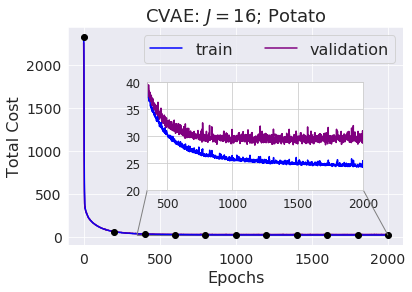

In [13]:
# get history for choosen model:
choosen_latent = 16
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CVAE: $J={:}$; Potato'.format(choosen_latent), fontsize=18)
    
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200,400,600,800,1000,1200,1400,1600,1800,2000]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=4)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 350, no_epochs, 20, 40                         # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_vae_potato_J{choosen_latent}.png", dpi=300, bbox_inches='tight')
plt.show()

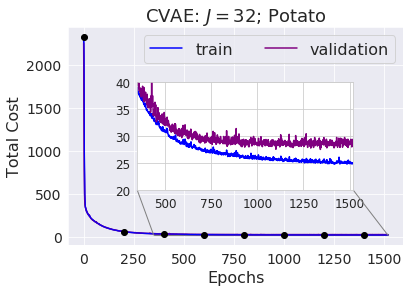

In [14]:
# get history for choosen model:
choosen_latent = 32
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CVAE: $J={:}$; Potato'.format(choosen_latent), fontsize=18)
    
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200,400,600,800,1000,1200,1400]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=5)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 350, no_epochs, 20, 40                         # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_vae_potato_J{choosen_latent}.png", dpi=300, bbox_inches='tight')
plt.show()

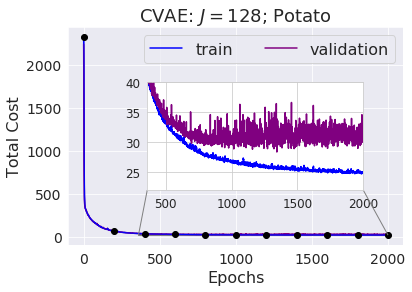

In [15]:
# get history for choosen model:
choosen_latent = 128
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CVAE: $J={:}$; Potato'.format(choosen_latent), fontsize=18)
    
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200,400,600,800,1000,1200,1400,1600,1800,2000]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=4)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 360, no_epochs, 22, 40                         # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_vae_potato_J{choosen_latent}.png", dpi=300, bbox_inches='tight')
plt.show()

## Error vs. Intermediate Dimensionality (lantent space / bottleneck)

Average reconstruction error

In [16]:
from utils_VAE_AE import rec_statistics

In [17]:
def mean_of_mean(allMeans):
    """
    compute the mean of means and its error.
    """
    MeanOfMean = allMeans.mean()
    err = allMeans.std(ddof=1) / np.sqrt(len(allMeans))
    return MeanOfMean, err

### Load Pre-Computed Reconstruction Errors of Models and subsequently compute their statistics

over more than one run

In [18]:
""" indexing """
LATENT_NAMES = ('J=2', 'J=4', 'J=8', 'J=16', 'J=32', 'J=64', 'J=128')
ALL_FILENAMES = ['J2_AR50', 'J4_AR50', 'J8_AR50', 'J16_AR50','J32_AR50', 'J64_AR50', 'J128_AR50']

In [19]:
""" Normal Samples """
COLUMN_NAMES = 'rec0_mean'

""" read mean reconstruction errors """
dfs_normal = []
for m in range(len(ALL_FILENAMES)):
    # load column from dataframe:
    df = pd.read_csv(f'{PATH}/{ALL_FILENAMES[m]}.csv', 
                     usecols = [f'{COLUMN_NAMES}']
                    )
    # append to empty list:
    dfs_normal.append(df)

# convert to dataframe:
dfs_normal = pd.concat(dfs_normal, axis=1)
dfs_normal.columns = LATENT_NAMES
#dfs_normal

""" compute mean of means and its error for each latent dimension and save as numpy arrays """
rec0_means, rec0_errs = [], []
for column_name in dfs_normal:
    rec0_means.append(mean_of_mean(dfs_normal[column_name].values)[0])
    rec0_errs.append(mean_of_mean(dfs_normal[column_name].values)[1])
    
#print (rec0_means.shape, rec0_errs.shape)

In [20]:
""" Metal Samples """
COLUMN_NAMES = 'rec1_mean'

""" read mean reconstruction errors """
dfs_anomaly = []
for m in range(len(ALL_FILENAMES)):
    # load column from dataframe:
    df = pd.read_csv(f'{PATH}/{ALL_FILENAMES[m]}.csv', 
                     usecols = [f'{COLUMN_NAMES}']
                    )
    # append to empty list:
    dfs_anomaly.append(df)

# convert to dataframe:
dfs_anomaly = pd.concat(dfs_anomaly, axis=1)
dfs_anomaly.columns = LATENT_NAMES
#dfs_anomaly

""" compute mean of means and its error for each latent dimension and save as numpy arrays """
rec1_means, rec1_errs = [], []
for column_name in dfs_anomaly:
    rec1_means.append(mean_of_mean(dfs_anomaly[column_name].values)[0])
    rec1_errs.append(mean_of_mean(dfs_anomaly[column_name].values)[1])
    
#print (rec1_means.shape, rec1_errs.shape)

In [21]:
""" Hollow Samples """
COLUMN_NAMES = 'rec2_mean'

""" read mean reconstruction errors """
dfs_anomaly = []
for m in range(len(ALL_FILENAMES)):
    # load column from dataframe:
    df = pd.read_csv(f'{PATH}/{ALL_FILENAMES[m]}.csv', 
                     usecols = [f'{COLUMN_NAMES}']
                    )
    # append to empty list:
    dfs_anomaly.append(df)

# convert to dataframe:
dfs_anomaly = pd.concat(dfs_anomaly, axis=1)
dfs_anomaly.columns = LATENT_NAMES
#dfs_anomaly

""" compute mean of means and its error for each latent dimension and save as numpy arrays """
rec2_means, rec2_errs = [], []
for column_name in dfs_anomaly:
    rec2_means.append(mean_of_mean(dfs_anomaly[column_name].values)[0])
    rec2_errs.append(mean_of_mean(dfs_anomaly[column_name].values)[1])
    
#print (rec2_means.shape, rec2_errs.shape)

In [22]:
""" Anomaly Samples """
COLUMN_NAMES = 'rec1ALL_mean'

""" read mean reconstruction errors """
dfs_anomaly = []
for m in range(len(ALL_FILENAMES)):
    # load column from dataframe:
    df = pd.read_csv(f'{PATH}/{ALL_FILENAMES[m]}.csv', 
                     usecols = [f'{COLUMN_NAMES}']
                    )
    # append to empty list:
    dfs_anomaly.append(df)

# convert to dataframe:
dfs_anomaly = pd.concat(dfs_anomaly, axis=1)
dfs_anomaly.columns = LATENT_NAMES
#dfs_anomaly

""" compute mean of means and its error for each latent dimension and save as numpy arrays """
rec1ALL_means, rec1ALL_errs = [], []
for column_name in dfs_anomaly:
    rec1ALL_means.append(mean_of_mean(dfs_anomaly[column_name].values)[0])
    rec1ALL_errs.append(mean_of_mean(dfs_anomaly[column_name].values)[1])
    
#print (rec1ALL_means.shape, rec1ALL_errs.shape)

### Plot


https://matplotlib.org/stable/api/markers_api.html

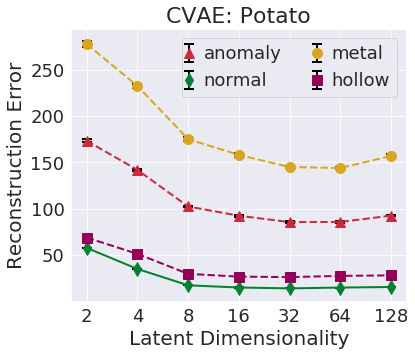

In [23]:
sns.set_style("darkgrid")
mpl.rcParams['legend.handlelength'] = 0

fig, ax = plt.subplots(figsize=(6,5))

N = (2, 4, 8, 16, 32, 64, 128)
ax.errorbar(N, rec1ALL_means, rec1ALL_errs, fmt="--^", linewidth=2, elinewidth=2, capsize=5, capthick=2, markersize=10,
            color='#cd2a3d', ecolor="black", label="anomaly")
ax.errorbar(N, rec0_means, rec0_errs, fmt="-d", linewidth=2, elinewidth=2, capsize=5, capthick=2, markersize=10, 
            color="#008230", ecolor="black", label="normal")
ax.errorbar(N, rec1_means, rec1_errs, fmt="--o", linewidth=2, elinewidth=2, capsize=5, capthick=2, markersize=10,
            color='goldenrod', ecolor="black", label="metal")
ax.errorbar(N, rec2_means, rec2_errs, fmt="--s", linewidth=2, elinewidth=2, capsize=5, capthick=2, markersize=10,
            color='#960056', ecolor="black", label="hollow")

ticks = [2, 4, 8, 16, 32, 64, 128]
ax.set_xscale('log', basex=2)
ax.set_xticklabels(ticks)
plt.xticks(ticks, fontsize=18)
plt.yticks(fontsize=18)
#plt.grid(True, color='#8c8c8c', alpha=0.4, linestyle='-')
plt.title('CVAE: Potato', fontsize=22)
ax.set_ylabel('Reconstruction Error',fontsize=20)
ax.set_xlabel('Latent Dimensionality',fontsize=20)
plt.legend(loc='upper right', ncol=2, fontsize=18)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/latentdimensions_vae_potato.png", dpi=300, bbox_inches='tight')
plt.show()

# Evaluation Metrics: Compute Mean Results and their Errors



In [24]:
pd.options.display.float_format = "{:,.3}".format

COLUMN_NAMES = ['auc_score', 'specificity', 'sensitivity', 'precision', 
                'macro_f1', 'accuracy', 'misclassification']

### Anomaly Ratio = 50%

In [25]:
anomaly_rate = 50

In [26]:
""" J=2 """
latent_dim = 2
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J2_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.774,0.674,0.707,0.685,0.69,0.69,0.31
error (+/-),0.00198,0.00948,0.011,0.00328,0.00193,0.00193,0.00193


In [27]:
""" J=4 """
latent_dim = 4
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J4_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.832,0.715,0.804,0.739,0.759,0.76,0.24
error (+/-),0.00227,0.00785,0.00882,0.00368,0.00215,0.00214,0.00214


In [28]:
""" J=8 """
latent_dim = 8
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J8_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.873,0.83,0.778,0.821,0.804,0.804,0.196
error (+/-),0.0018,0.00522,0.00414,0.00417,0.00203,0.00205,0.00205


In [29]:
""" J=16 """
latent_dim = 16
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J16_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.892,0.84,0.801,0.834,0.82,0.82,0.18
error (+/-),0.00163,0.00667,0.00718,0.00474,0.00178,0.00176,0.00176


In [30]:
""" J=32 """
latent_dim = 32
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J32_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.904,0.844,0.818,0.841,0.831,0.831,0.169
error (+/-),0.00146,0.00883,0.0103,0.00596,0.00197,0.002,0.002


In [31]:
""" J=64 """
latent_dim = 64
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J64_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.894,0.832,0.81,0.829,0.821,0.821,0.179
error (+/-),0.00128,0.00542,0.00518,0.00382,0.0012,0.0012,0.0012


In [32]:
""" J=128 """
latent_dim = 128
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J128_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.899,0.845,0.809,0.84,0.827,0.827,0.173
error (+/-),0.00133,0.00647,0.00686,0.00478,0.00188,0.00187,0.00187


### Anomaly Ratio = [5, 10, 30, 50, 70, 90, 95] %, $J=32$

In [33]:
latent_dim = 32

In [34]:
""" Anomaly Ratio = 5% """
anomaly_rate = 5
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR5 = res['macro_f1'].values[0]
F1err_AR5  = res['macro_f1'].values[1]

TNR_AR5    = res['specificity'].values[0]
TNRerr_AR5 = res['specificity'].values[1]
TPR_AR5    = res['sensitivity'].values[0]
TPRerr_AR5 = res['sensitivity'].values[1]
PPV_AR5    = res['precision'].values[0]
PPVerr_AR5 = res['precision'].values[1]

# show dataframe:
res

J32_AR5


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.906,0.832,0.88,0.234,0.634,0.835,0.165
error (+/-),0.00699,0.0183,0.0175,0.015,0.0146,0.0169,0.0169


In [35]:
""" Anomaly Ratio = 10% """
anomaly_rate = 10
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR10 = res['macro_f1'].values[0]
F1err_AR10  = res['macro_f1'].values[1]

TNR_AR10    = res['specificity'].values[0]
TNRerr_AR10 = res['specificity'].values[1]
TPR_AR10    = res['sensitivity'].values[0]
TPRerr_AR10 = res['sensitivity'].values[1]
PPV_AR10    = res['precision'].values[0]
PPVerr_AR10 = res['precision'].values[1]

# show dataframe:
res

J32_AR10


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.883,0.828,0.816,0.361,0.694,0.827,0.173
error (+/-),0.00581,0.0147,0.0163,0.0205,0.0124,0.0122,0.0122


In [36]:
""" Anomaly Ratio = 30% """
anomaly_rate = 30
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR30 = res['macro_f1'].values[0]
F1err_AR30  = res['macro_f1'].values[1]

TNR_AR30    = res['specificity'].values[0]
TNRerr_AR30 = res['specificity'].values[1]
TPR_AR30    = res['sensitivity'].values[0]
TPRerr_AR30 = res['sensitivity'].values[1]
PPV_AR30    = res['precision'].values[0]
PPVerr_AR30 = res['precision'].values[1]

# show dataframe:
res

J32_AR30


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.898,0.859,0.794,0.709,0.815,0.839,0.161
error (+/-),0.00343,0.00707,0.0101,0.00893,0.00377,0.0037,0.0037


In [37]:
""" Anomaly Ratio = 50% """
anomaly_rate = 50
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR50 = res['macro_f1'].values[0]
F1err_AR50  = res['macro_f1'].values[1]

TNR_AR50    = res['specificity'].values[0]
TNRerr_AR50 = res['specificity'].values[1]
TPR_AR50    = res['sensitivity'].values[0]
TPRerr_AR50 = res['sensitivity'].values[1]
PPV_AR50    = res['precision'].values[0]
PPVerr_AR50 = res['precision'].values[1]

# show dataframe:
res

J32_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.904,0.844,0.818,0.841,0.831,0.831,0.169
error (+/-),0.00146,0.00883,0.0103,0.00596,0.00197,0.002,0.002


In [38]:
""" Anomaly Ratio = 70% """
anomaly_rate = 70
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR70 = res['macro_f1'].values[0]
F1err_AR70  = res['macro_f1'].values[1]

TNR_AR70    = res['specificity'].values[0]
TNRerr_AR70 = res['specificity'].values[1]
TPR_AR70    = res['sensitivity'].values[0]
TPRerr_AR70 = res['sensitivity'].values[1]
PPV_AR70    = res['precision'].values[0]
PPVerr_AR70 = res['precision'].values[1]

# show dataframe:
res

J32_AR70


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.905,0.852,0.809,0.928,0.803,0.822,0.178
error (+/-),0.00156,0.00951,0.0102,0.0035,0.00428,0.0049,0.0049


In [39]:
""" Anomaly Ratio = 90% """
anomaly_rate = 90
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR90 = res['macro_f1'].values[0]
F1err_AR90  = res['macro_f1'].values[1]

TNR_AR90    = res['specificity'].values[0]
TNRerr_AR90 = res['specificity'].values[1]
TPR_AR90    = res['sensitivity'].values[0]
TPRerr_AR90 = res['sensitivity'].values[1]
PPV_AR90    = res['precision'].values[0]
PPVerr_AR90 = res['precision'].values[1]

# show dataframe:
res

J32_AR90


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.908,0.861,0.822,0.982,0.698,0.826,0.174
error (+/-),0.00376,0.0157,0.0128,0.00194,0.00943,0.0104,0.0104


In [40]:
""" Anomaly Ratio = 95% """
anomaly_rate = 95
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR95 = res['macro_f1'].values[0]
F1err_AR95  = res['macro_f1'].values[1]

TNR_AR95    = res['specificity'].values[0]
TNRerr_AR95 = res['specificity'].values[1]
TPR_AR95    = res['sensitivity'].values[0]
TPRerr_AR95 = res['sensitivity'].values[1]
PPV_AR95    = res['precision'].values[0]
PPVerr_AR95 = res['precision'].values[1]

# show dataframe:
res

J32_AR95


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.887,0.84,0.813,0.99,0.607,0.815,0.185
error (+/-),0.00677,0.0146,0.0131,0.000962,0.0126,0.0125,0.0125


### Plot macro-average $F_1$-scores

In [44]:
save_measurements = False

In [42]:
# stack scores:
F1_mean = np.array([F1mean_AR5, F1mean_AR10, F1mean_AR30, F1mean_AR50, F1mean_AR70, F1mean_AR90, F1mean_AR95])
F1_err  = np.array([F1err_AR5, F1err_AR10, F1err_AR30, F1err_AR50, F1err_AR70, F1err_AR90, F1err_AR95])

TNR_mean = np.array([TNR_AR5, TNR_AR10, TNR_AR30, TNR_AR50, TNR_AR70, TNR_AR90, TNR_AR95])
TNR_err  = np.array([TNRerr_AR5, TNRerr_AR10, TNRerr_AR30, TNRerr_AR50, TNRerr_AR70, TNRerr_AR90, TNRerr_AR95])

TPR_mean = np.array([TPR_AR5, TPR_AR10, TPR_AR30, TPR_AR50, TPR_AR70, TPR_AR90, TPR_AR95])
TPR_err  = np.array([TPRerr_AR5, TPRerr_AR10, TPRerr_AR30, TPRerr_AR50, TPRerr_AR70, TPRerr_AR90, TPRerr_AR95])

PPV_mean = np.array([PPV_AR5, PPV_AR10, PPV_AR30, PPV_AR50, PPV_AR70, PPV_AR90, PPV_AR95])
PPV_err  = np.array([PPVerr_AR5, PPVerr_AR10, PPVerr_AR30, PPVerr_AR50, PPVerr_AR70, PPVerr_AR90, PPVerr_AR95])

# save scores as `.npy` files:
if save_measurements == True:
    np.save(f'{MEASUREMENTS_FOLDER}/F1_mean.npy', F1_mean)
    np.save(f'{MEASUREMENTS_FOLDER}/F1_err.npy', F1_err)
    np.save(f'{MEASUREMENTS_FOLDER}/TNR_mean.npy', TNR_mean)
    np.save(f'{MEASUREMENTS_FOLDER}/TNR_err.npy', TNR_err)
    np.save(f'{MEASUREMENTS_FOLDER}/TPR_mean.npy', TPR_mean)
    np.save(f'{MEASUREMENTS_FOLDER}/TPR_err.npy', TPR_err)
    np.save(f'{MEASUREMENTS_FOLDER}/PPV_mean.npy', PPV_mean)
    np.save(f'{MEASUREMENTS_FOLDER}/PPV_err.npy', PPV_err)

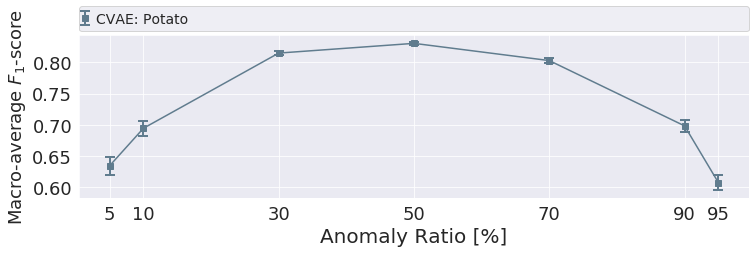

In [43]:
sns.set_style("darkgrid")
mpl.rcParams['legend.handlelength'] = 0

#fig, ax = plt.subplots(figsize=(6,5))
fig, ax = plt.subplots(figsize=(12,3))

N = (5, 10, 30, 50, 70, 90, 95)
ax.errorbar(N, F1_mean, F1_err, fmt="-s", linewidth=1.5, elinewidth=2, capsize=5, capthick=2, markersize=6, 
             color='#607c8e', ecolor='#607c8e', label="CVAE: Potato")

ticks = [5, 10, 30, 50, 70, 90, 95]
#ax.set_xscale('log', basex=20)
plt.xticks(ticks, fontsize=18)
plt.yticks(fontsize=18)

#plt.grid(True, color='#8c8c8c', alpha=0.4, linestyle='-')
#plt.title('Anomaly Ratios', fontsize=22, pad=40)
ax.set_ylabel(r'Macro-average $F_1$-score',fontsize=18)
ax.set_xlabel('Anomaly Ratio [%]',fontsize=20)

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand', borderaxespad=0, ncol=1,
               numpoints=1, fontsize=14) 

plt.show()